# Pandas groupby aggregator

In [1]:
import pandas as pd
import zipfile
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# 로컬에 ZIP 파일 직접 다운받아 읽는 방법

In [2]:
zpf = zipfile.ZipFile('../data/anonymisedData.zip')

zip파일내 파일 확인

In [3]:
zpf

<zipfile.ZipFile filename='../data/anonymisedData.zip' mode='r'>

In [4]:
zpf.filelist

[<ZipInfo filename='studentAssessment.csv' compress_type=deflate file_size=5690310 compress_size=1028292>,
 <ZipInfo filename='studentVle.csv' compress_type=deflate file_size=453836331 compress_size=45180527>,
 <ZipInfo filename='assessments.csv' compress_type=deflate file_size=8200 compress_size=1276>,
 <ZipInfo filename='courses.csv' compress_type=deflate file_size=526 compress_size=159>,
 <ZipInfo filename='studentInfo.csv' compress_type=deflate file_size=3461652 compress_size=305880>,
 <ZipInfo filename='studentRegistration.csv' compress_type=deflate file_size=1109984 compress_size=206737>,
 <ZipInfo filename='vle.csv' compress_type=deflate file_size=260126 compress_size=26957>]

### 텍스트.split('구분자') : str --> list
- 구분자 기준으로 텍스트를 나누어 리스트로 만든다
- zpf.filelist는 내부 특수 데이터 형태이기에 str()을 취해 텍스트로 전환한 후

In [5]:
zpf.filelist[0]

<ZipInfo filename='studentAssessment.csv' compress_type=deflate file_size=5690310 compress_size=1028292>

In [6]:
str(zpf.filelist[0])

"<ZipInfo filename='studentAssessment.csv' compress_type=deflate file_size=5690310 compress_size=1028292>"

In [7]:
str(zpf.filelist[0]).split('=')

['<ZipInfo filename',
 "'studentAssessment.csv' compress_type",
 'deflate file_size',
 '5690310 compress_size',
 '1028292>']

### ('구분자').join(리스트) : list --> str
리스트를 구분자로 구분하여 텍스트로 만든다

In [8]:
'?????'.join(str(zpf.filelist[0]).split('='))

"<ZipInfo filename?????'studentAssessment.csv' compress_type?????deflate file_size?????5690310 compress_size?????1028292>"

### 텍스트.replace('a', 'b'), 
텍스트안의 'a'를 'b'로 변경한다

In [9]:
'?????'.join(str(zpf.filelist[0]).split('=')).replace('?????', '')

"<ZipInfo filename'studentAssessment.csv' compress_typedeflate file_size5690310 compress_size1028292>"

In [10]:
'Zip' in str(zpf.filelist[0])

True

### 파일명만 읽는 코드

In [11]:
str(zpf.filelist[0]).split('=')[1].split()[0].replace("'", '')

'studentAssessment.csv'

In [12]:
from tqdm.notebook import tqdm
import time
for i in tqdm(zpf.filelist):
    time.sleep(2)
    file = str(i).split('=')[1].split()[0].replace("'", '')
    print(file)

studentAssessment.csv
studentVle.csv
assessments.csv
courses.csv
studentInfo.csv
studentRegistration.csv
vle.csv



In [152]:
mylist=[]
for i in range(10):
    mylist.append(i)

mylist

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

### file_list라는 사전형자료에 반복문으로 파일을 읽어 key값은 파일명, value값은 데이터프레임을 계속 저장한다

In [18]:
zpf.filelist

[<ZipInfo filename='studentAssessment.csv' compress_type=deflate file_size=5690310 compress_size=1028292>,
 <ZipInfo filename='studentVle.csv' compress_type=deflate file_size=453836331 compress_size=45180527>,
 <ZipInfo filename='assessments.csv' compress_type=deflate file_size=8200 compress_size=1276>,
 <ZipInfo filename='courses.csv' compress_type=deflate file_size=526 compress_size=159>,
 <ZipInfo filename='studentInfo.csv' compress_type=deflate file_size=3461652 compress_size=305880>,
 <ZipInfo filename='studentRegistration.csv' compress_type=deflate file_size=1109984 compress_size=206737>,
 <ZipInfo filename='vle.csv' compress_type=deflate file_size=260126 compress_size=26957>]

In [17]:
file_list =dict()

for i in tqdm(zpf.filelist):
    time.sleep(3)
    file = str(i).split('=')[1].split()[0].replace("'", '')
    file_name = file.split('.')[0]
    print(file_name)
    tf = pd.read_csv(zpf.open(file))
    #pd.read_csv(zpf.open(file_name)).shape
    file_list.update({file_name: tf}) # file_name을 key값으로 하고 해당 dataframe을 value로 사전형데이터에 저장

studentAssessment
studentVle
assessments
courses
studentInfo
studentRegistration
vle



In [ ]:
file_list.

In [154]:
file_list['studentAssessment']

,id_assessment,id_student,date_submitted,is_banked,score
0,1752,11391,18,0,78.0
1,1752,28400,22,0,70.0
2,1752,31604,17,0,72.0
3,1752,32885,26,0,69.0
4,1752,38053,19,0,79.0
...,...,...,...,...,...
173907,37443,527538,227,0,60.0
173908,37443,534672,229,0,100.0
173909,37443,546286,215,0,80.0
173910,37443,546724,230,0,100.0


# 데이터 한개 씩 읽기

In [15]:
file_list.keys()

dict_keys(['studentAssessment', 'studentVle', 'assessments', 'courses', 'studentInfo', 'studentRegistration', 'vle'])

In [16]:
file_list['studentAssessment']

,id_assessment,id_student,date_submitted,is_banked,score
0,1752,11391,18,0,78.0
1,1752,28400,22,0,70.0
2,1752,31604,17,0,72.0
3,1752,32885,26,0,69.0
4,1752,38053,19,0,79.0
...,...,...,...,...,...
173907,37443,527538,227,0,60.0
173908,37443,534672,229,0,100.0
173909,37443,546286,215,0,80.0
173910,37443,546724,230,0,100.0


In [156]:
student_ass = pd.read_csv(zpf.open('studentAssessment.csv'))

In [157]:
student_vle = pd.read_csv(zpf.open('studentVle.csv'))
student_vle

,code_module,code_presentation,id_student,id_site,date,sum_click
0,AAA,2013J,28400,546652,-10,4
1,AAA,2013J,28400,546652,-10,1
2,AAA,2013J,28400,546652,-10,1
3,AAA,2013J,28400,546614,-10,11
4,AAA,2013J,28400,546714,-10,1
...,...,...,...,...,...,...
10655275,GGG,2014J,675811,896943,269,3
10655276,GGG,2014J,675578,896943,269,1
10655277,GGG,2014J,654064,896943,269,3
10655278,GGG,2014J,654064,896939,269,1


## Groupby

In [158]:
student_groups = student_vle.groupby('id_student')
student_groups 

## Count Aggregator

In [159]:
activity_counts = student_groups.count()
activity_counts

,code_module,code_presentation,id_site,date,sum_click
id_student,,,,,
6516,662,662,662,662,662
8462,304,304,304,304,304
11391,196,196,196,196,196
23629,59,59,59,59,59
23698,305,305,305,305,305
...,...,...,...,...,...
2698251,529,529,529,529,529
2698257,267,267,267,267,267
2698535,899,899,899,899,899


# Mean Average Aggregator

In [160]:
average_clicks = student_groups.mean()
average_clicks

,id_site,date,sum_click
id_student,,,
6516,877282.676737,110.483384,4.216012
8462,675792.838816,37.128289,2.157895
11391,546697.668367,102.132653,4.765306
23629,542863.067797,43.033898,2.728814
23698,911160.937705,85.639344,2.983607
...,...,...,...
2698251,773040.007561,79.848771,2.856333
2698257,546690.715356,94.059925,2.838951
2698535,588821.272525,70.668521,4.717464


In [161]:
print('Mean of median clicks per activity is', average_clicks['sum_click'].mean())
average_clicks.head()

Mean of median clicks per activity is 3.277612411690163


,id_site,date,sum_click
id_student,,,
6516,877282.676737,110.483384,4.216012
8462,675792.838816,37.128289,2.157895
11391,546697.668367,102.132653,4.765306
23629,542863.067797,43.033898,2.728814
23698,911160.937705,85.639344,2.983607


In [162]:
activities_and_clicks = pd.merge(left=activity_counts['id_site'], 
                                 right=average_clicks['sum_click'],
                                 how='inner',
                                 on='id_student')

cols = ['Total Activities Engaged', 'Average Clicks per Activity']
activities_and_clicks.columns = cols
activities_and_clicks.head()

,Total Activities Engaged,Average Clicks per Activity
id_student,,
6516,662,4.216012
8462,304,2.157895
11391,196,4.765306
23629,59,2.728814
23698,305,2.983607


## Other Groupings

In [163]:
module_group = student_vle.groupby('code_module')
module_averages = module_group.mean()
module_counts = module_group.count()
modules = pd.merge(module_counts['id_site'], 
                                module_averages['sum_click'],
                                how='inner',
                                on='code_module')

modules.columns = ['Total Activities Engaged','Average Clicks per Activity']
modules

,Total Activities Engaged,Average Clicks per Activity
code_module,,
AAA,350298,3.558833
BBB,1567564,3.339051
CCC,1207827,3.876506
DDD,2166486,2.552562
EEE,961433,4.144051
FFF,4014499,4.382595
GGG,387173,3.445189


## Multi-Indexing

In [164]:
cols = ['id_student','code_presentation','code_module']
reg_groups = student_vle.groupby(cols)

reg_averages = reg_groups.mean()
reg_averages.head()

id_site        date  sum_click
id_student code_presentation code_module                                      
6516       2014J             AAA          877282.676737  110.483384   4.216012
8462       2013J             DDD          673952.073333   37.490000   2.153333
           2014J             DDD          813850.250000   10.000000   2.500000
11391      2013J             AAA          546697.668367  102.132653   4.765306
23629      2013B             BBB          542863.067797   43.033898   2.728814

In [165]:
cols = ['code_module','code_presentation','id_student']
groupby_module= student_vle.groupby(cols)
module_averages = groupby_module.mean()
module_averages.head()

id_site        date  sum_click
code_module code_presentation id_student                                      
AAA         2013J             11391       546697.668367  102.132653   4.765306
                              28400       546704.453488   86.993023   3.337209
                              30268       546721.092105    2.355263   3.697368
                              31604       546712.515837  106.147813   3.254902
                              32885       546721.215909   91.934659   2.937500

###  Tuple Indices

In [166]:
reg_averages.loc[(8462,'2013J','DDD'), 'sum_click']

2.1533333333333333

## Flattening a Multi-Index

In [167]:
flat_module_averages = module_averages.reset_index()
flat_module_averages.head()

,code_module,code_presentation,id_student,id_site,date,sum_click
0,AAA,2013J,11391,546697.668367,102.132653,4.765306
1,AAA,2013J,28400,546704.453488,86.993023,3.337209
2,AAA,2013J,30268,546721.092105,2.355263,3.697368
3,AAA,2013J,31604,546712.515837,106.147813,3.254902
4,AAA,2013J,32885,546721.215909,91.934659,2.937500


## pivoting

In [168]:
def summary(df) :
    tf = pd.DataFrame({'데이터형태(dtypes)' : df.dtypes,
                       '결측치 수(null)' : df.isnull().sum(),
                       '결측치 비율' : (df.isnull().sum()/df.shape[0]).round(4)*100,
                       '고유값 수(nunique)' : df.nunique()})
    return tf

In [169]:
file_list.keys()

dict_keys(['studentAssessment', 'studentVle', 'assessments', 'courses', 'studentInfo', 'studentRegistration', 'vle'])

In [170]:
df= file_list['assessments']

In [171]:
summary(df)

,데이터형태(dtypes),결측치 수(null),결측치 비율,고유값 수(nunique)
code_module,object,0,0.00,7
code_presentation,object,0,0.00,4
id_assessment,int64,0,0.00,206
assessment_type,object,0,0.00,3
date,float64,11,5.34,74
weight,float64,0,0.00,24


In [172]:
df['code_module'].unique()
type(df['code_module'].unique())

array(['AAA', 'BBB', 'CCC', 'DDD', 'EEE', 'FFF', 'GGG'], dtype=object)

numpy.ndarray

### np.array도 iterable object

In [173]:
for i in df['code_module'].unique():
    print(f'code_moule은 {i}')
    print(df[(df['code_module'] == i)][['id_assessment', 'weight']].mean())
    print('*'*100)

code_moule은 AAA
id_assessment    1757.500000
weight             33.333333
dtype: float64
****************************************************************************************************
code_moule은 BBB
id_assessment    15004.500000
weight              19.047619
dtype: float64
****************************************************************************************************
code_moule은 CCC
id_assessment    25870.2
weight              30.0
dtype: float64
****************************************************************************************************
code_moule은 DDD
id_assessment    25351.000000
weight              22.857143
dtype: float64
****************************************************************************************************
code_moule은 EEE
id_assessment    30716.0
weight              40.0
dtype: float64
****************************************************************************************************
code_moule은 FFF
id_assessment    34885.500000
weight          

In [174]:
cartoon_cols = ["id_assessment", "weight"]
pivot = df.pivot_table(index="code_module", values=cartoon_cols) # mean값
pivot

,id_assessment,weight
code_module,,
AAA,1757.5,33.333333
BBB,15004.5,19.047619
CCC,25870.2,30.000000
DDD,25351.0,22.857143
EEE,30716.0,40.000000
FFF,34885.5,15.384615
GGG,37429.5,10.000000


In [175]:
pivot.pivot_table(index="code_module", values= "weight")

,weight
code_module,
AAA,33.333333
BBB,19.047619
CCC,30.000000
DDD,22.857143
EEE,40.000000
FFF,15.384615
GGG,10.000000


# <font color='purple'> 과제_02

In [176]:
info = file_list['studentInfo']
info.head()
info.shape

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass


(32593, 12)

In [177]:
info[(info['studied_credits'] >= 240) & (info['final_result'] == 'Pass')].shape

(57, 12)

In [178]:
info.groupby('code_module')['studied_credits'].mean()

code_module
AAA    84.438503
BBB    84.072576
CCC    77.487596
DDD    86.647800
EEE    65.436264
FFF    90.845143
GGG    34.459353
Name: studied_credits, dtype: float64

In [179]:
info.groupby('code_module')['studied_credits'].mean()[('EEE')]

65.43626448534424

In [180]:
info['id_student'].nunique()
info['id_student'].unique()

28785

array([  11391,   28400,   30268, ..., 2648187, 2679821, 2684003],
      dtype=int64)

In [181]:
info['age_band'].value_counts()
info['age_band'].value_counts(normalize=True)

0-35     22944
35-55     9433
55<=       216
Name: age_band, dtype: int64

0-35     0.703955
35-55    0.289418
55<=     0.006627
Name: age_band, dtype: float64

In [182]:
info['imd_band'].value_counts()

20-30%     3654
30-40%     3539
10-20      3516
0-10%      3311
40-50%     3256
50-60%     3124
60-70%     2905
70-80%     2879
80-90%     2762
90-100%    2536
Name: imd_band, dtype: int64

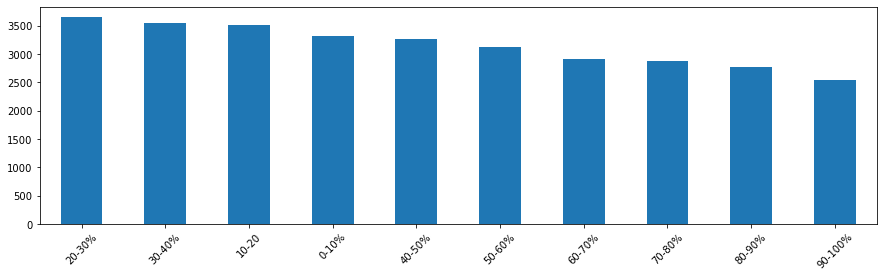

In [183]:
import matplotlib as plt
info['imd_band'].value_counts().plot(kind='bar', rot= '45', figsize=(15,4))

In [184]:
info['imd_band'].value_counts(dropna=False)

20-30%     3654
30-40%     3539
10-20      3516
0-10%      3311
40-50%     3256
50-60%     3124
60-70%     2905
70-80%     2879
80-90%     2762
90-100%    2536
NaN        1111
Name: imd_band, dtype: int64

In [185]:
assess = file_list['studentAssessment']
assess.head(3)

,id_assessment,id_student,date_submitted,is_banked,score
0,1752,11391,18,0,78.0
1,1752,28400,22,0,70.0
2,1752,31604,17,0,72.0


In [186]:
info_ass = pd.merge(info, assess, on = ['id_student'], how='left')
info_ass.head()
info_ass.shape

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,id_assessment,date_submitted,is_banked,score
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,1752.0,18.0,0.0,78.0
1,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,1753.0,53.0,0.0,85.0
2,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,1754.0,115.0,0.0,80.0
3,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,1755.0,164.0,0.0,85.0
4,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,1756.0,212.0,0.0,82.0


(213166, 16)

In [187]:
summary(info_ass)

,데이터형태(dtypes),결측치 수(null),결측치 비율,고유값 수(nunique)
code_module,object,0,0.00,7
code_presentation,object,0,0.00,4
id_student,int64,0,0.00,28785
gender,object,0,0.00,2
region,object,0,0.00,13
highest_education,object,0,0.00,5
imd_band,object,9413,4.42,10
age_band,object,0,0.00,3
num_of_prev_attempts,int64,0,0.00,7
studied_credits,int64,0,0.00,61


In [188]:
info.isnull().sum()

code_module                0
code_presentation          0
id_student                 0
gender                     0
region                     0
highest_education          0
imd_band                1111
age_band                   0
num_of_prev_attempts       0
studied_credits            0
disability                 0
final_result               0
dtype: int64

In [189]:
summary(file_list['studentInfo'])

,데이터형태(dtypes),결측치 수(null),결측치 비율,고유값 수(nunique)
code_module,object,0,0.00,7
code_presentation,object,0,0.00,4
id_student,int64,0,0.00,28785
gender,object,0,0.00,2
region,object,0,0.00,13
highest_education,object,0,0.00,5
imd_band,object,1111,3.41,10
age_band,object,0,0.00,3
num_of_prev_attempts,int64,0,0.00,7
studied_credits,int64,0,0.00,61


# End